In [1]:
import numpy as np
import scipy.linalg as la
import pandas as pd
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter

from similarity_network_fusion import SNF

In [2]:
from data_cube import DataCube

In [3]:
dc = DataCube(
    subjects=["01","10","20","30"],
    gestures=["3","4","5","6"],
    channels=["2", "4", "6", "8"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(100, 50)
dc.normalize_modalities(smooth=True)

dc.get_min_obs(smooth=True)

In [4]:
def cumulative_ts(xi, xj):
    """
    cumulated version of the time series w/ euclidean distance
    in which we take the sum values over time as time increases
    and then apply the chosen metric.
    xi, xj - arrays of data points
    """
    return la.norm(xi[:,1:].sum(axis=0)-xj[:,1:].sum(axis=0))

In [5]:
def fading_ts(xi, xj, mtrc=la.norm):
    """
    xi, xj - instances of time series metrics
    xi := (i, vi); vi \in R^D
    n - length of time series
    """
    return abs(xi[0]-xj[0]) * mtrc(xi[1:]-xj[1:])

In [ ]:
g = dc.data_set_smooth["20"]["6_0_1"][:,:-1]

In [ ]:
# generate raw signal SSMs for each gesture
ced_ssm = np.zeros(shape=(g.shape[0], g.shape[0]))
for i in range(g.shape[0]):
    for j in range(g.shape[0]):
        ced_ssm[i,j] = cumulative_ts(g[:i,:], g[:j,:])

In [ ]:
plt.imshow(ced_ssm)
plt.show()

---

In [ ]:
# generate raw signal SSMs for each gesture
fts_ssm = np.zeros(shape=(g.shape[0], g.shape[0]))
for i in range(g.shape[0]):
    for j in range(g.shape[0]):
        fts_ssm[i,j] = fading_ts(g[i], g[j])

In [ ]:
plt.imshow(fts_ssm)
plt.show()

---

In [6]:
s1_dct = {"left" : np.zeros(shape=(g.shape[0], g.shape[0])),
          "right" : np.zeros(shape=(g.shape[0], g.shape[0])),
          "up" : np.zeros(shape=(g.shape[0], g.shape[0])),
          "down" : np.zeros(shape=(g.shape[0], g.shape[0]))}

NameError: name 'g' is not defined

In [ ]:
g_dct = {"left" : "3_0_1", "right" : "4_0_1", "up" : "5_0_1", "down" : "6_0_1"}

In [7]:
m1_dct = {}
for gst, num in g_dct.items():
    m1_dct[gst] = np.zeros(shape=(
        dc.data_set_smooth["01"][num].shape[0],
        dc.data_set_smooth["01"][num].shape[0]))
    sz = dc.data_set_smooth["01"][num].shape[0]
    for i in range(sz):
        for j in range(sz):
            m1_dct[gst][i,j] = cumulative_ts(
                dc.data_set_smooth["01"][num][:i,:-1],
                dc.data_set_smooth["01"][num][:j,:-1])

NameError: name 'g_dct' is not defined

In [ ]:
m2_dct = {}
for gst, num in g_dct.items():
    m2_dct[gst] = np.zeros(shape=(
        dc.data_set_smooth["01"][num].shape[0],
        dc.data_set_smooth["01"][num].shape[0]))
    sz = dc.data_set_smooth["01"][num].shape[0]
    for i in range(sz):
        for j in range(sz):
            m2_dct[gst][i,j] = fading_ts(
                dc.data_set_smooth["01"][num][i,:-1],
                dc.data_set_smooth["01"][num][j,:-1])

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.suptitle("Comparing Time-Series Metrics: Subject 1")
plt.subplot(241)
plt.title("Left")
plt.imshow(m1_dct["left"])
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title("Right")
plt.imshow(m1_dct["right"])
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title("Up")
plt.imshow(m1_dct["up"])
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title("Down")
plt.imshow(m1_dct["down"])
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.imshow(m2_dct["left"])
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.imshow(m2_dct["right"])
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.imshow(m2_dct["up"])
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.imshow(m2_dct["down"])
plt.xticks([])
plt.yticks([])
plt.savefig("../../Thesis/LaTeX_template/images/ssm_mtrc_compare.png", bbox_inches = 'tight',
    pad_inches = 0)

---

In [9]:
g_dct = {"p1" : "3_0_1", "p2" : "3_0_2", "p3" : "3_1_1", "p4" : "3_1_2"}

In [10]:
m1_dct = {}
for gst, num in g_dct.items():
    m1_dct[gst] = np.zeros(shape=(
        dc.data_set_smooth["01"][num].shape[0],
        dc.data_set_smooth["01"][num].shape[0]))
    sz = dc.data_set_smooth["01"][num].shape[0]
    for i in range(sz):
        for j in range(sz):
            m1_dct[gst][i,j] = cumulative_ts(
                dc.data_set_smooth["01"][num][:i,:-1],
                dc.data_set_smooth["01"][num][:j,:-1])

In [11]:
m2_dct = {}
for gst, num in g_dct.items():
    m2_dct[gst] = np.zeros(shape=(
        dc.data_set_smooth["01"][num].shape[0],
        dc.data_set_smooth["01"][num].shape[0]))
    sz = dc.data_set_smooth["01"][num].shape[0]
    for i in range(sz):
        for j in range(sz):
            m2_dct[gst][i,j] = fading_ts(
                dc.data_set_smooth["01"][num][i,:-1],
                dc.data_set_smooth["01"][num][j,:-1])

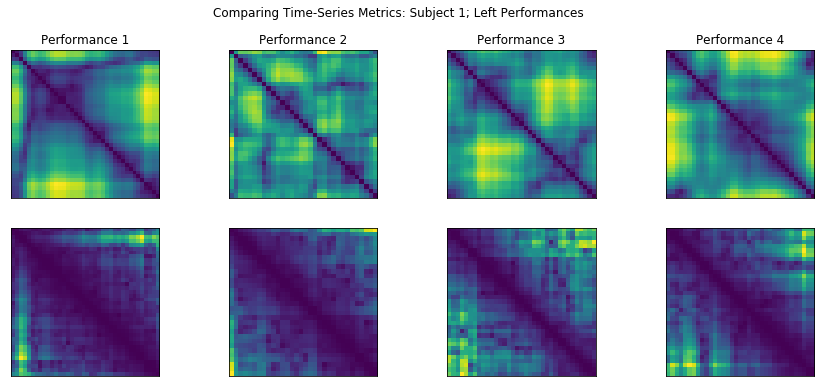

In [12]:
plt.figure(num=None, figsize=(15, 6))
plt.suptitle("Comparing Time-Series Metrics: Subject 1; Left Performances")
plt.subplot(241)
plt.title("Performance 1")
plt.imshow(m1_dct["p1"])
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title("Performance 2")
plt.imshow(m1_dct["p2"])
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title("Performance 3")
plt.imshow(m1_dct["p3"])
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title("Performance 4")
plt.imshow(m1_dct["p4"])
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.imshow(m2_dct["p1"])
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.imshow(m2_dct["p2"])
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.imshow(m2_dct["p3"])
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.imshow(m2_dct["p4"])
plt.xticks([])
plt.yticks([])
plt.savefig("../../Thesis/LaTeX_template/images/ssm_mtrc_compare2.png", bbox_inches = 'tight',
    pad_inches = 0)

---

In [13]:
s_dct = {"01" : "3_0_1", "10" : "4_0_1", "20" : "5_0_1", "30" : "6_0_1"}

In [14]:
m1_dct = {}
for sbj, num in s_dct.items():
    m1_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["3_0_1"].shape[0],
        dc.data_set_smooth[sbj]["3_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["3_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m1_dct[sbj][i,j] = cumulative_ts(
                dc.data_set_smooth[sbj]["3_0_1"][:i,:-1],
                dc.data_set_smooth[sbj]["3_0_1"][:j,:-1])

In [15]:
m2_dct = {}
for sbj, num in s_dct.items():
    m2_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["3_0_1"].shape[0],
        dc.data_set_smooth[sbj]["3_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["3_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m2_dct[sbj][i,j] = fading_ts(
                dc.data_set_smooth[sbj]["3_0_1"][i,:-1],
                dc.data_set_smooth[sbj]["3_0_1"][j,:-1])

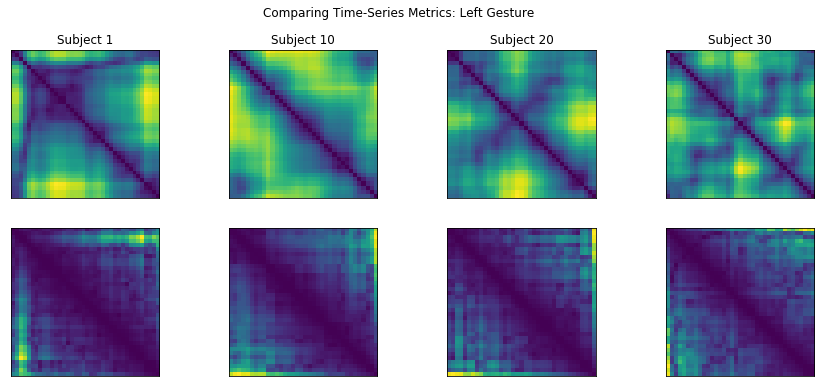

In [16]:
plt.figure(num=None, figsize=(15, 6))
plt.suptitle("Comparing Time-Series Metrics: Left Gesture")
plt.subplot(241)
plt.title("Subject 1")
plt.imshow(m1_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title("Subject 10")
plt.imshow(m1_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title("Subject 20")
plt.imshow(m1_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title("Subject 30")
plt.imshow(m1_dct["30"])
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.imshow(m2_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.imshow(m2_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.imshow(m2_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.imshow(m2_dct["30"])
plt.xticks([])
plt.yticks([])
plt.savefig("../../Thesis/LaTeX_template/images/ssm_mtrc_compare3.png", bbox_inches = 'tight',
    pad_inches = 0)

---

In [ ]:
m1_dct = {}
for sbj, num in s_dct.items():
    m1_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["4_0_1"].shape[0],
        dc.data_set_smooth[sbj]["4_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["4_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m1_dct[sbj][i,j] = cumulative_ts(
                dc.data_set_smooth[sbj]["4_0_1"][:i,:-1],
                dc.data_set_smooth[sbj]["4_0_1"][:j,:-1])

In [ ]:
m2_dct = {}
for sbj, num in s_dct.items():
    m2_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["4_0_1"].shape[0],
        dc.data_set_smooth[sbj]["4_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["4_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m2_dct[sbj][i,j] = fading_ts(
                dc.data_set_smooth[sbj]["4_0_1"][i,:-1],
                dc.data_set_smooth[sbj]["4_0_1"][j,:-1])

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.suptitle("Comparing Time-Series Metrics: Right Gesture")
plt.subplot(241)
plt.title("Subject 1")
plt.imshow(m1_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title("Subject 10")
plt.imshow(m1_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title("Subject 20")
plt.imshow(m1_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title("Subject 30")
plt.imshow(m1_dct["30"])
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.imshow(m2_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.imshow(m2_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.imshow(m2_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.imshow(m2_dct["30"])
plt.xticks([])
plt.yticks([])
plt.show()

---

In [ ]:
m1_dct = {}
for sbj, num in s_dct.items():
    m1_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["5_0_1"].shape[0],
        dc.data_set_smooth[sbj]["5_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["5_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m1_dct[sbj][i,j] = cumulative_ts(
                dc.data_set_smooth[sbj]["5_0_1"][:i,:-1],
                dc.data_set_smooth[sbj]["5_0_1"][:j,:-1])

In [ ]:
m2_dct = {}
for sbj, num in s_dct.items():
    m2_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["5_0_1"].shape[0],
        dc.data_set_smooth[sbj]["5_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["5_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m2_dct[sbj][i,j] = fading_ts(
                dc.data_set_smooth[sbj]["5_0_1"][i,:-1],
                dc.data_set_smooth[sbj]["5_0_1"][j,:-1])

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.suptitle("Comparing Time-Series Metrics: Up Gesture")
plt.subplot(241)
plt.title("Subject 1")
plt.imshow(m1_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title("Subject 10")
plt.imshow(m1_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title("Subject 20")
plt.imshow(m1_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title("Subject 30")
plt.imshow(m1_dct["30"])
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.imshow(m2_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.imshow(m2_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.imshow(m2_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.imshow(m2_dct["30"])
plt.xticks([])
plt.yticks([])
plt.show()

---

In [ ]:
m1_dct = {}
for sbj, num in s_dct.items():
    m1_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["6_0_1"].shape[0],
        dc.data_set_smooth[sbj]["6_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["6_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m1_dct[sbj][i,j] = cumulative_ts(
                dc.data_set_smooth[sbj]["6_0_1"][:i,:-1],
                dc.data_set_smooth[sbj]["6_0_1"][:j,:-1])

In [ ]:
m2_dct = {}
for sbj, num in s_dct.items():
    m2_dct[sbj] = np.zeros(shape=(
        dc.data_set_smooth[sbj]["6_0_1"].shape[0],
        dc.data_set_smooth[sbj]["6_0_1"].shape[0]))
    sz = dc.data_set_smooth[sbj]["6_0_1"].shape[0]
    for i in range(sz):
        for j in range(sz):
            m2_dct[sbj][i,j] = fading_ts(
                dc.data_set_smooth[sbj]["6_0_1"][i,:-1],
                dc.data_set_smooth[sbj]["6_0_1"][j,:-1])

In [ ]:
plt.figure(num=None, figsize=(15, 6))
plt.suptitle("Comparing Time-Series Metrics: Down Gesture")
plt.subplot(241)
plt.title("Subject 1")
plt.imshow(m1_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(242)
plt.title("Subject 10")
plt.imshow(m1_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(243)
plt.title("Subject 20")
plt.imshow(m1_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(244)
plt.title("Subject 30")
plt.imshow(m1_dct["30"])
plt.xticks([])
plt.yticks([])
plt.subplot(245)
plt.imshow(m2_dct["01"])
plt.xticks([])
plt.yticks([])
plt.subplot(246)
plt.imshow(m2_dct["10"])
plt.xticks([])
plt.yticks([])
plt.subplot(247)
plt.imshow(m2_dct["20"])
plt.xticks([])
plt.yticks([])
plt.subplot(248)
plt.imshow(m2_dct["30"])
plt.xticks([])
plt.yticks([])
plt.show()